In [15]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END

from typing import Annotated
from langgraph.graph.message import add_messages

In [16]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [17]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')

In [18]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model='gpt-4o-mini')

In [19]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

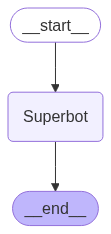

In [20]:
graph=StateGraph(State)

graph.add_node("Superbot",superbot)

graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

graph_builder=graph.compile(checkpointer=memory)

from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
# config={"configurable":{"thread_id":"1"}}
# graph_builder.invoke({"messages":"Hi,My name is bhupen,Hows weather there?"},config)

{'messages': [HumanMessage(content='Hi,My name is bhupen,Hows weather there?', additional_kwargs={}, response_metadata={}, id='92e2ad26-5a60-4159-b76a-86c6279875b9'),
  AIMessage(content="Hi Bhupen! I'm just a text-based AI and can't check the weather in real-time or know your location. However, you can easily check the weather using a weather app, website, or by asking a voice assistant. How can I assist you further?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 20, 'total_tokens': 73, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CDrhgtEfodMo1ioncWUd110cLhSEc', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a10e16b2-7acb-4bf1-8004-5

##### Streaming the response with stream method

In [21]:
config={"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({"messages":"Hi,My name is bhupen,i'd like to watch football"},config,stream_mode='updates'):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content='Hi Bhupen! That sounds great! Football is an exciting sport with a huge following around the world. Are you looking for information about specific teams, leagues, or upcoming matches? Or do you need help with where to watch games? Let me know how I can assist you!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 21, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e665f7564b', 'id': 'chatcmpl-CDrrX7bpvaPJCGwrWqbrJI4nGPwzq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c6039a7b-a06f-481b-aa30-df463b5cac4a-0', usage_metadata={'input_tokens': 21, 'output_tokens': 57, 'total_tokens': 78, 'input_token_detai

In [22]:
config={"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({"messages":"i also like cricket"},config,stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content="Hi,My name is bhupen,i'd like to watch football", additional_kwargs={}, response_metadata={}, id='27866f1e-d460-44b2-9f35-4f69b758ad4e'), AIMessage(content='Hi Bhupen! That sounds great! Football is an exciting sport with a huge following around the world. Are you looking for information about specific teams, leagues, or upcoming matches? Or do you need help with where to watch games? Let me know how I can assist you!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 21, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e665f7564b', 'id': 'chatcmpl-CDrrX7bpvaPJCGwrWqbrJI4nGPwzq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}

In [23]:
config={"configurable":{"thread_id":"2"}}
for chunk in graph_builder.stream({"messages":"i love sports"},config,stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content="Hi,My name is bhupen,i'd like to watch football", additional_kwargs={}, response_metadata={}, id='27866f1e-d460-44b2-9f35-4f69b758ad4e'), AIMessage(content='Hi Bhupen! That sounds great! Football is an exciting sport with a huge following around the world. Are you looking for information about specific teams, leagues, or upcoming matches? Or do you need help with where to watch games? Let me know how I can assist you!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 21, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e665f7564b', 'id': 'chatcmpl-CDrrX7bpvaPJCGwrWqbrJI4nGPwzq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}

#### Streaming the response with astream method

In [24]:
config={"configurable":{"thread_id":"3"}}

async for event in graph_builder.astream_events({"messages":"Hi My name is bhupen and i like hip hop music"},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'Hi My name is bhupen and i like hip hop music'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '14747b6d-5361-4876-8607-52fd521240c0', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi My name is bhupen and i like hip hop music', additional_kwargs={}, response_metadata={}, id='c23f8f8d-4608-4dd7-86d4-8328c46240ae')]}}, 'name': 'Superbot', 'tags': ['graph:step:1'], 'run_id': 'c76e5c8d-7da2-4cba-a710-a2b8bc081f83', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'Superbot', 'langgraph_triggers': ('branch:to:Superbot',), 'langgraph_path': ('__pregel_pull', 'Superbot'), 'langgraph_checkpoint_ns': 'Superbot:58ee0cf0-92b9-809f-7867-fee9bd7d2033'}, 'parent_ids': ['14747b6d-5361-4876-8607-52fd521240c0']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi My name is bhupen and i like hip hop m